<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_13OP-Cloth_Size_Prediction/blob/main/Cloth_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloth Size Prediction

## Basic Approach

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [ ]:
!pip install table-nan-val
!pip install execdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import table_nan_val as tnv
import execdata as exe

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_13OP-Cloth__Size_Prediction/main/dataset'
dataset_1 = 'cloth_size.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M


In [ ]:
print(f'the dataset_1 size is {df.shape}.')

the dataset_1 size is (119734, 4).


In [ ]:
# Check column name and categories
df.columns.values

array(['weight', 'age', 'height', 'size'], dtype=object)

In [ ]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


weight      0
age       257
height    330
size        0
dtype: int64

Your selected dataframe has 4 columns.
There are 2 columns that have missing values.


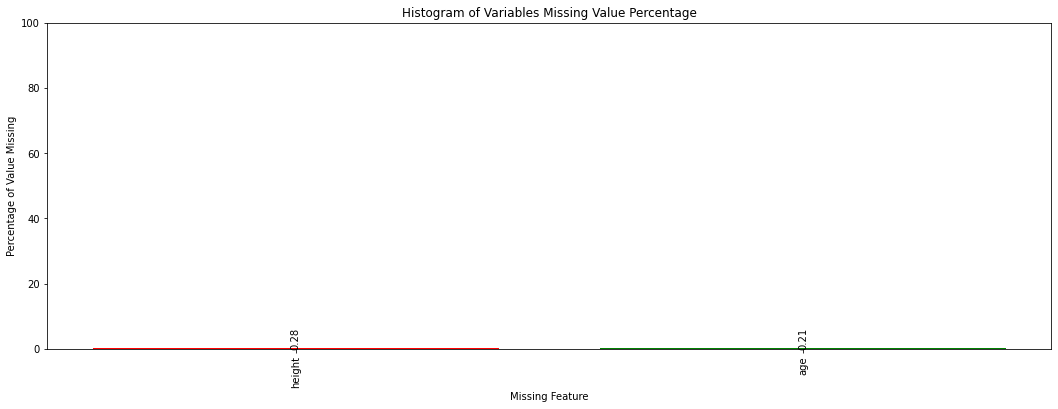

,index,Miss_Values,Miss_Rate,Available_Value
1,height,330,0.28,119404
0,age,257,0.21,119477


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 115627, (96.6%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:
print(df['State'].value_counts())
df['State'].value_counts().plot(kind='barh')
# df['State'].value_counts().plot(kind='bar')

KeyError: ignored

In [ ]:
# Analyze the cardinality of features
# array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],dtype=object)
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 2 binary categorical features: Gender
# 2 continuous features: Age, EstimatedSalary
# 1 possible drop features: User ID
# Target Variable: Purchased(Binary Categorical Features)

In [ ]:
# Drop duplicates
# df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
# Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)

In [ ]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'target variable name'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)
# we create the test train split first


In [ ]:
# pd.DataFrame(X_train).to_csv('train_x.csv')
# pd.DataFrame(X_test).to_csv('test_x.csv')
# pd.DataFrame(y_train).to_csv('train_y.csv')
# pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

NameError: ignored

In [ ]:
KNeighborsClassifier().get_params()

NameError: ignored

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

range(1, 31)


{'n_neighbors': range(1, 31), 'weights': ('uniform', 'distance')}

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

NameError: ignored

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

NameError: ignored

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))